In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [5]:
RISKY_ASSET = 'TSLA'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2018-01-01'
END_DATE = '2021-12-31'

In [6]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 830 rows of data.


In [7]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'TSLA', 
                                    MARKET_BENCHMARK: 'Market'}) \
                    .resample('M') \
                    .last() \
                    .pct_change() \
                    .dropna()
X.head()

,TSLA,Market
Date,,
2018-02-28,-0.031752,-0.038947
2018-03-31,-0.224246,-0.026884
2018-04-30,0.104347,0.002719
2018-05-31,-0.031201,0.021608
2018-06-30,0.204474,0.004842


In [8]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.Market.var()
beta = covariance / benchmark_variance
beta

2.098369034373953

In [9]:
# separate target
y = X.pop('TSLA')

# add constant
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y, X).fit()

# print results 
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     11.21
Date:                Wed, 21 Apr 2021   Prob (F-statistic):            0.00188
Time:                        10:44:26   Log-Likelihood:                 8.1256
No. Observations:                  39   AIC:                            -12.25
Df Residuals:                      37   BIC:                            -8.924
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0592      0.033      1.791      0.0

In [12]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
QUANDL_KEY = 'oEY4by7XiFVhyWsyVYyC' 
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2018-01-01', 
                end_date='2021-12-31')

df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

In [16]:
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (26, 1)


,price
Date,
2018-01-31,1331.67
2018-02-28,1331.52
2018-03-31,1324.66
2018-04-30,1334.74
2018-05-31,1303.03


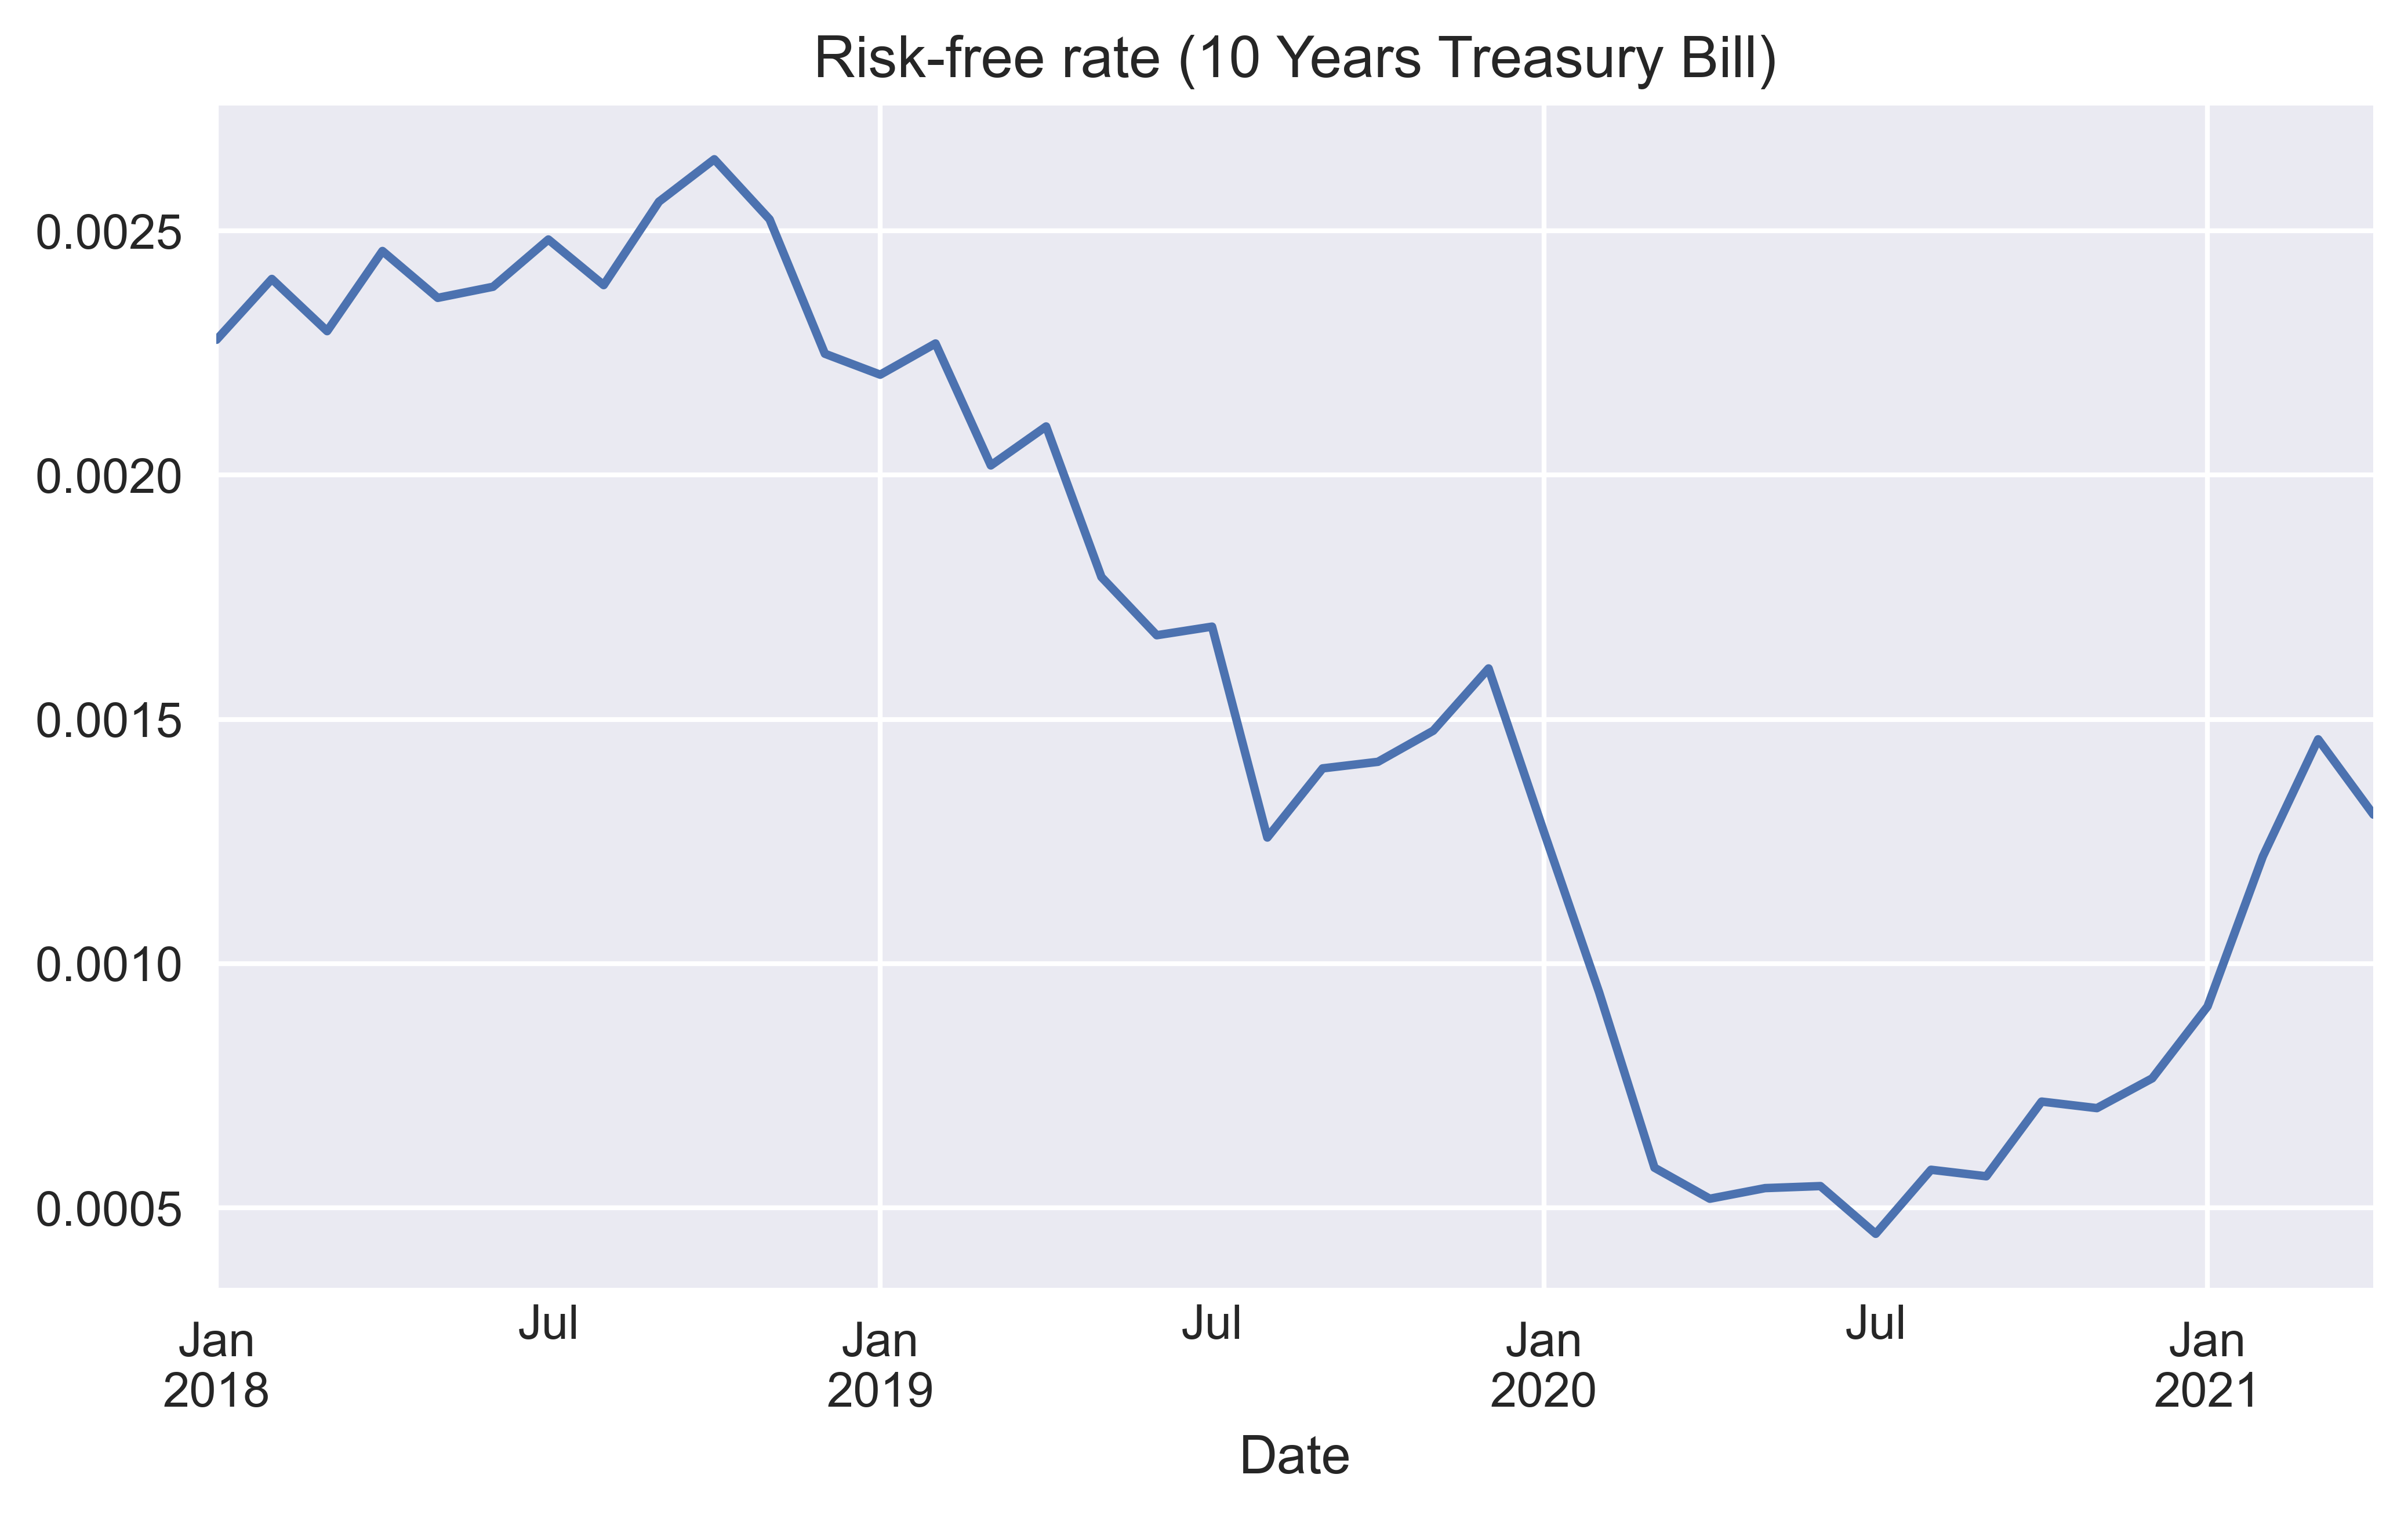

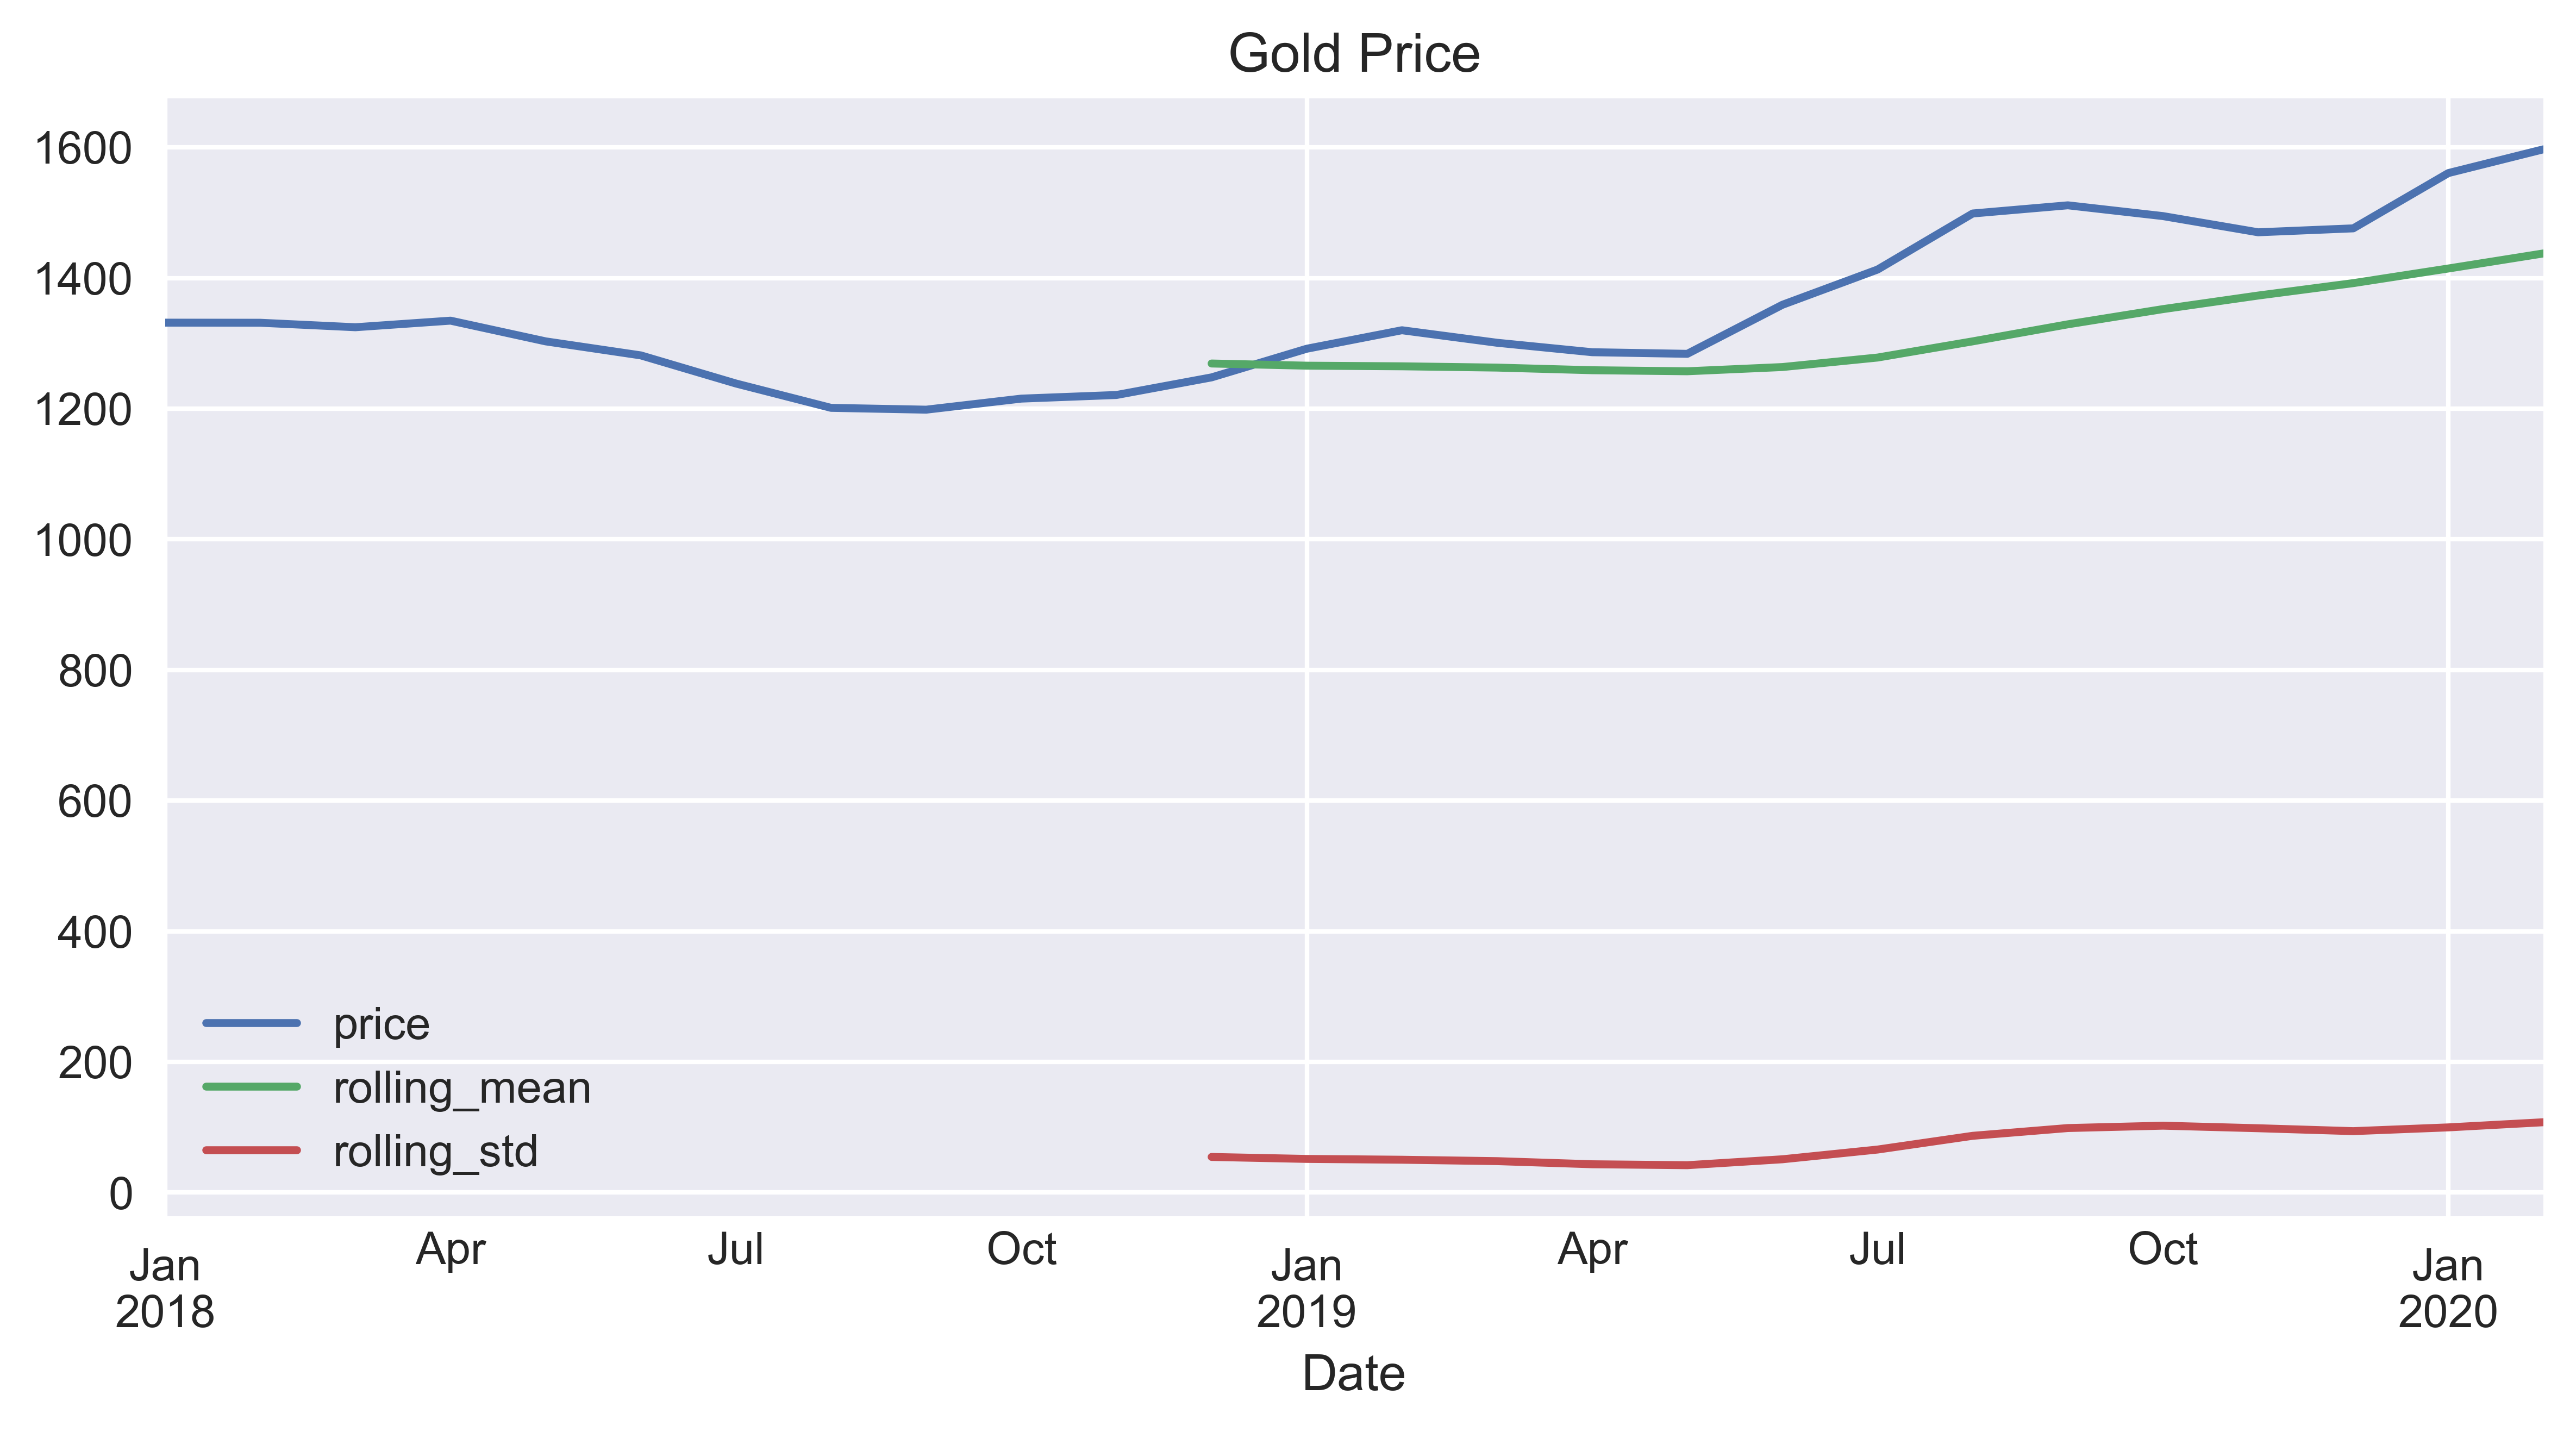

In [20]:
# period lenght in days
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download('^TNX',
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample('M').last().Close / 100

# calculate the corresponding daily risk-free return  
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# convert to monthly and subtract 1
rf = (rf ** 30) - 1 

# plot the risk-free rate
rf.plot(title='Risk-free rate (10 Years Treasury Bill)')

WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

plt.tight_layout()
# plt.savefig('images/ch4_im2.png')
plt.show()

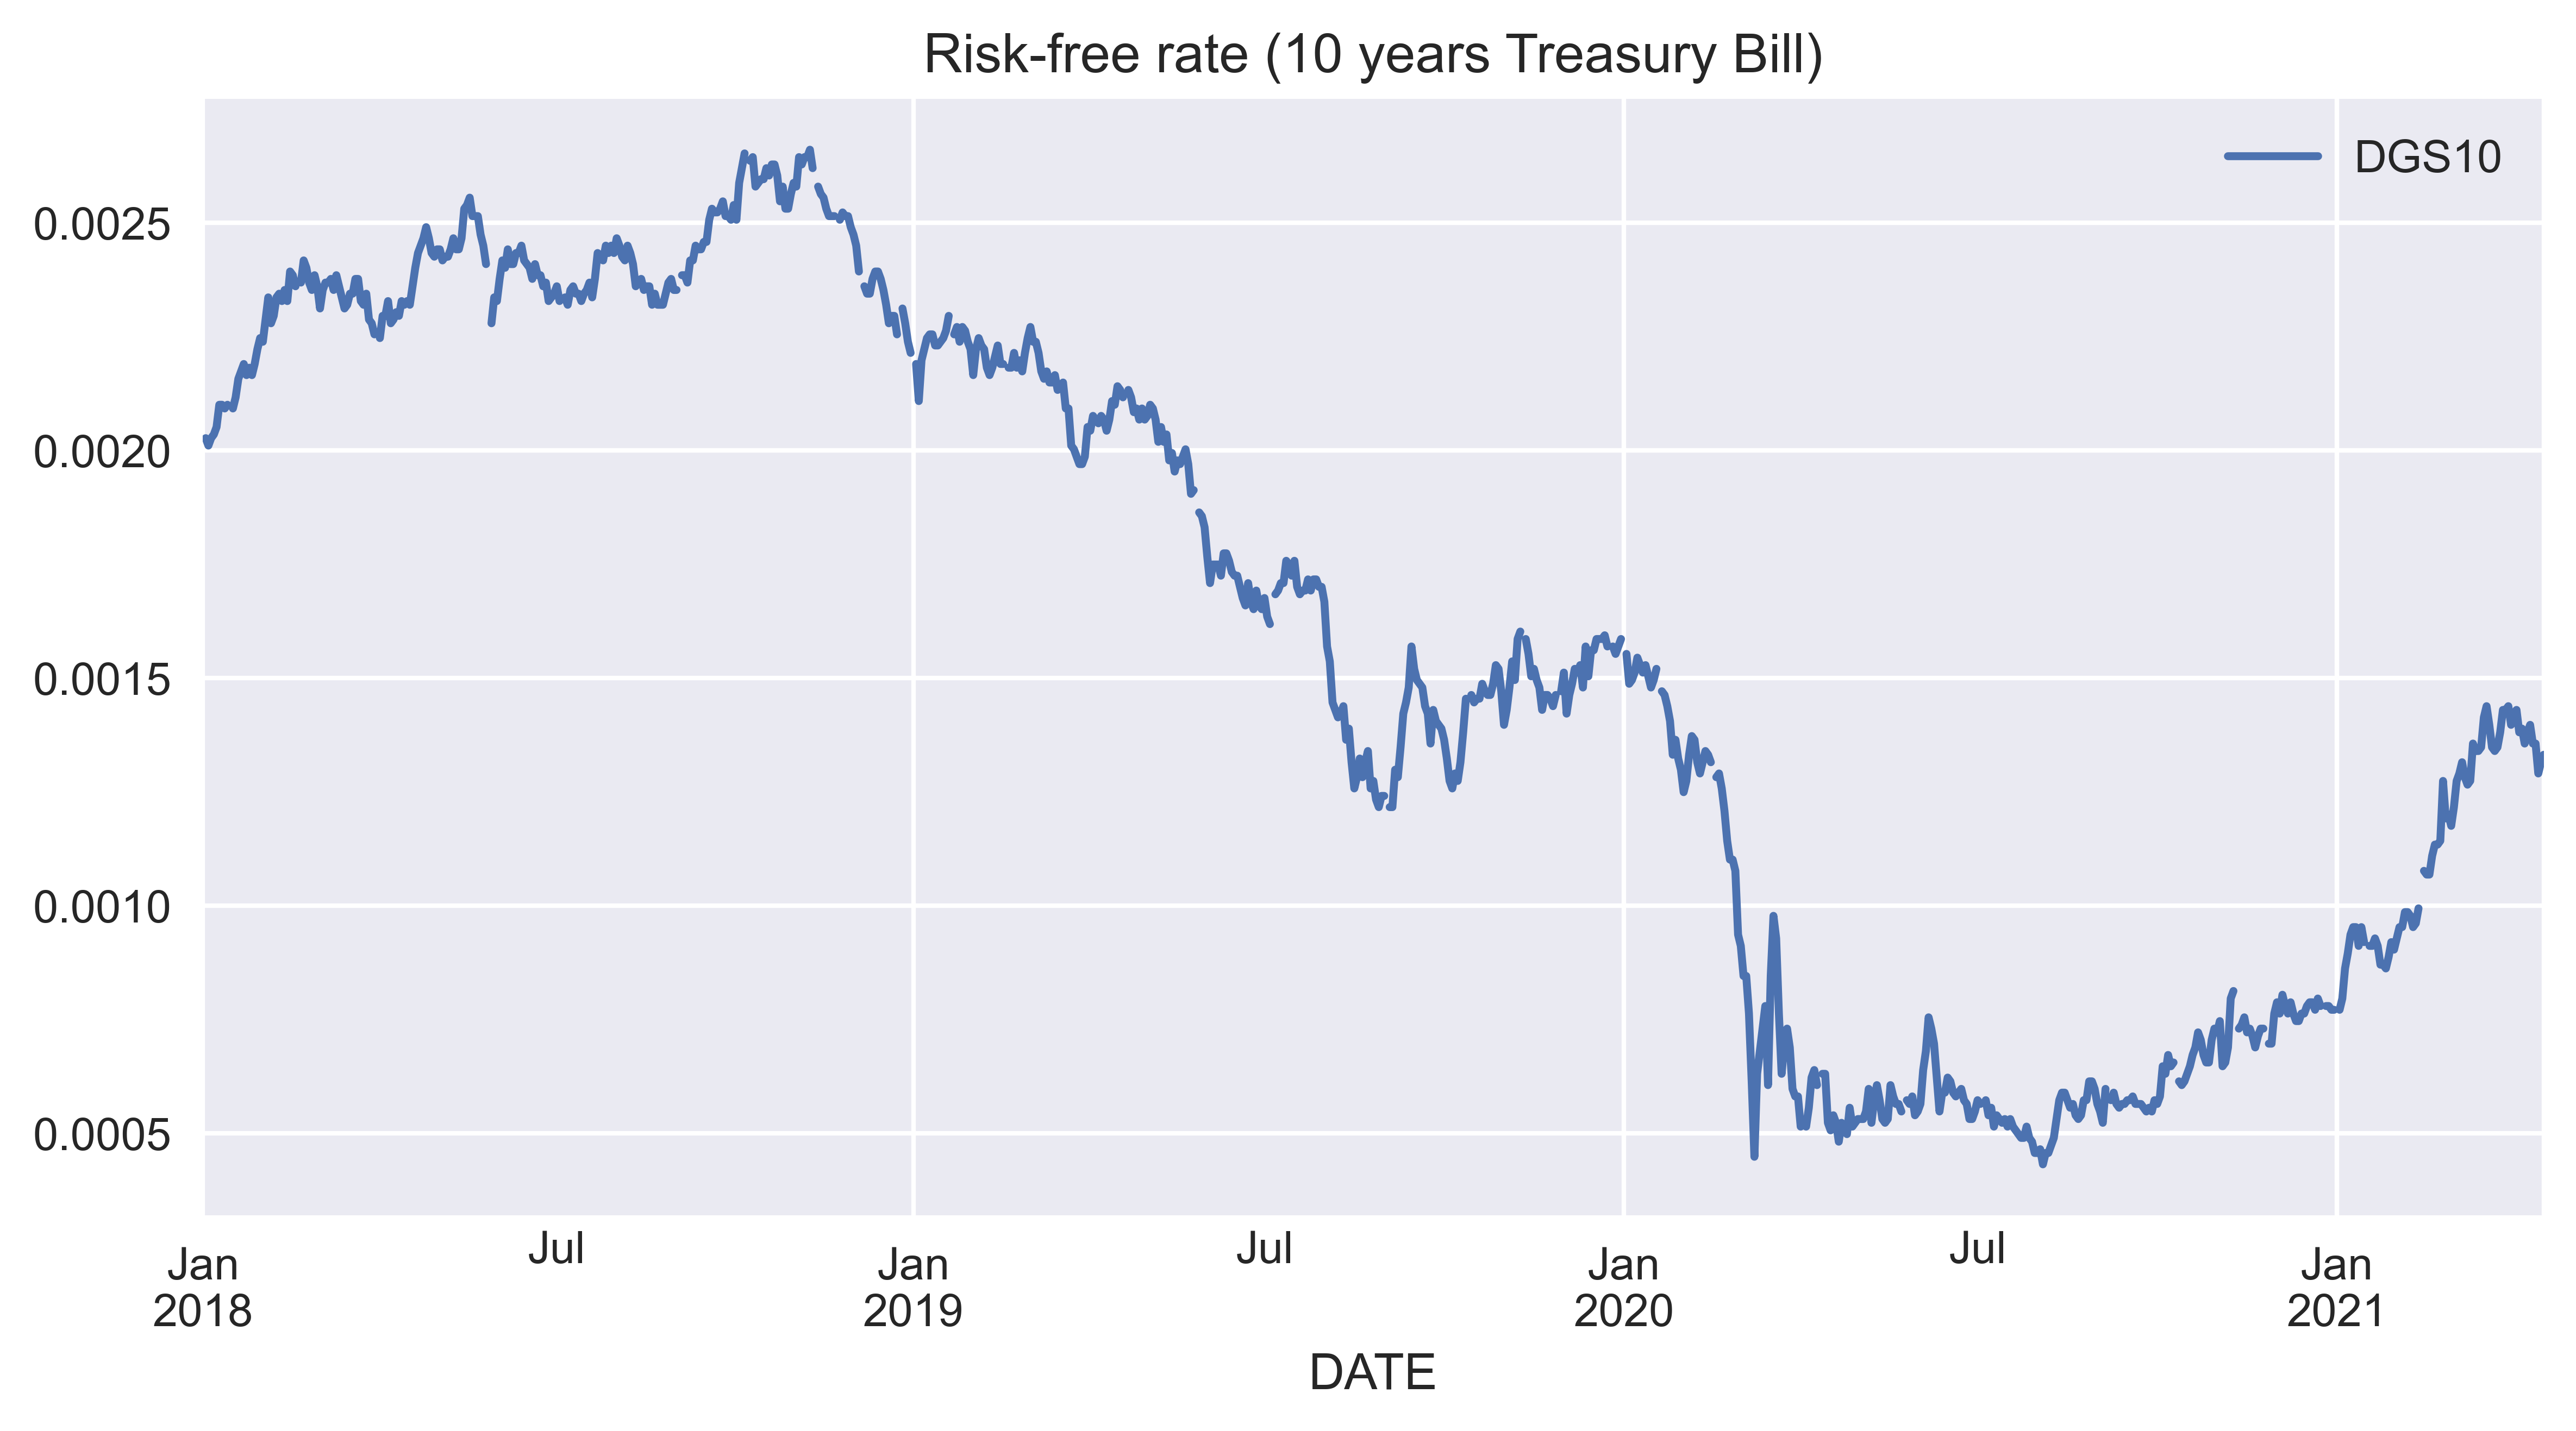

In [11]:
import pandas_datareader.data as web

# download the data 
rf = web.DataReader('DGS10', 'fred', start=START_DATE, end=END_DATE)

# convert to monthly
rf = (1 + (rf / 100)) ** (1 / 12) - 1

# plot the risk-free rate
rf.plot(title='Risk-free rate (10 years Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()